In [ ]:
# per la pagina web controllare: https://www.nbinteract.com/

In [24]:
%matplotlib notebook
from matplotlib.widgets import Slider, Button
import numpy as np
import matplotlib.pyplot as plt

In [25]:
prefactor = 298*1.380649*1e-23/(6.62607004*1e-34)
RT = 298*1.3806485*6.02214076
C = 298*1.380649*1e-23/(6.62607004*1e-34)

def kozn(g,I,T):
    '''function to compute Espan relevant quantities for an emergent cycle of n steps'''

    G_tmp =  []
    Gp_tmp = []
    

    n = len(I)
    
    #building relevant matrices
    G_mirror = np.tril(np.exp(g)*np.ones((n,n)),-1) + np.triu(np.ones((n,n)),0)
    for i in range(0,n):
        G_i = G_mirror[i][::-1]
        G_tmp.append(G_i)
        
    Gp_mirror = np.triu(np.exp(g)*np.ones((n,n)),1) + np.tril(np.ones((n,n)),0)
    for i in range(0,n):
        G_i = Gp_mirror[i][::-1]
        Gp_tmp.append(G_i)
        
    G = np.asarray(G_tmp)
    Gp= np.asarray(Gp_tmp)
    I = np.exp(-I)
    T = np.exp(T)
    PI = np.array([np.prod(I**-1)*I[n-1-i] for i in range(0,n)])
    PT = np.array([np.prod(T**-1)*T[n-1-i] for i in range(0,n)])
    
    
    TOF = prefactor*(np.exp(g) - 1)/np.dot(np.dot(G,I[::-1]),T)
    
    #compution XTOFs
    XTOFT = []
    XTOFI = []
    
    for t in range(0,n):
        Mt = T[t]*np.prod(T**-1)*np.dot(G[t],PI)
        M  = np.prod(T**-1)*np.dot(np.dot(G,PI),T)
        XTOFT.append(Mt/M)
    
    for i in range(0,n):
        Mi = I[i]*np.prod(I**-1)*np.dot(Gp[i],PT)
        M  = np.prod(I**-1)*np.dot(np.dot(Gp,PT),I)
        XTOFI.append(Mi/M)
        
    return TOF, XTOFT, XTOFI

In [26]:
### TEST

g=0
I = np.array([1,0,0,0])
T = np.array([1,0,0,0])

TOF= kozn(g,I,T)

TOF


(0.0,
 [0.4753668864186717,
  0.17487770452710943,
  0.17487770452710943,
  0.17487770452710943],
 [0.10923177257303593,
  0.29692274247565464,
  0.29692274247565464,
  0.29692274247565464])

<IPython.core.display.Javascript object>


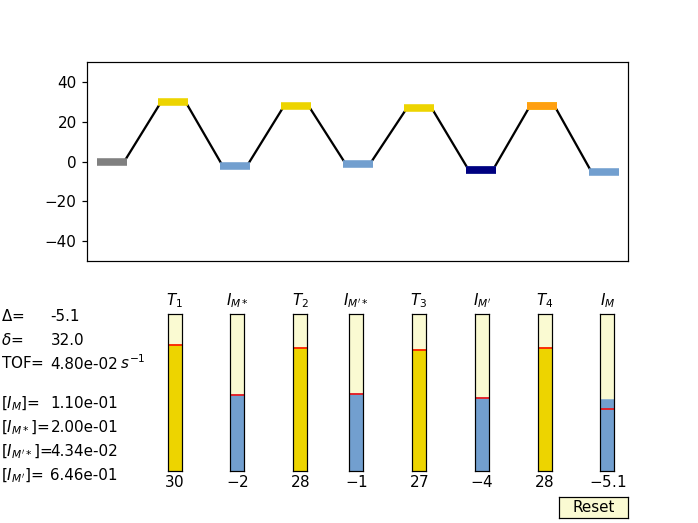

0

In [27]:
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.5)

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

ylim = 50
ax.set_ylim([-ylim, ylim])

######### STARTING SURFACE
i0 = 0.0
ii1, ii2, ii3, ii4 = -2,-1,-4,-11
it1, it2, it3, it4 = 30,28,27,28

iI = np.array([ii1,ii2,ii2,ii4])
iT = np.array([it1,it2,it3,it4])

iTOF, iXTOFT, iXTOFI  = kozn(-ii4,iI,iT)

######### Is and Ts

ax.plot(0,0,'_',c='#808080',markersize=20,markeredgewidth=5,zorder=10)
intermidiates, = plt.plot([1,2,3,4],[ii1,ii2,ii3,ii4],'_',c='#729fcfff',markersize=20,markeredgewidth=5,zorder=10)
transitionstates, = plt.plot([0.5,1.5,2.5,3.5],[it1,it2,it3,it4],'_',c='#edd400ff', markersize=20,markeredgewidth=5,zorder=10)
TDT, = plt.plot(np.argmax(iXTOFT)+0.5,[iT[np.argmax(iXTOFT)]],'_',c='#ff9f10ff',markersize=20,markeredgewidth=5,zorder=15)
TDI, = plt.plot(np.argmax(iXTOFI)+1,[iI[np.argmax(iXTOFI)]],'_',c='#000080ff',markersize=20,markeredgewidth=5,zorder=15)

########## LINES

l1l, = plt.plot([0.1, 0.4], [i0, it1],color='#000000ff',zorder=5)
l1r, = plt.plot([0.6, 0.9], [it1, ii1],color='#000000ff',zorder=5)

l2l, = plt.plot([1.1, 1.4], [ii1, it2],color='#000000ff',zorder=5)
l2r, = plt.plot([1.6, 1.9], [it2, ii2],color='#000000ff',zorder=5)

l3l, = plt.plot([2.1, 2.4], [ii2, it3],color='#000000ff',zorder=5)
l3r, = plt.plot([2.6, 2.9], [it3, ii3],color='#000000ff',zorder=5)

l4l, = plt.plot([3.1, 3.4], [ii3, it4],color='#000000ff',zorder=5)
l4r, = plt.plot([3.6, 3.9], [it4, ii4],color='#000000ff',zorder=5)

########## DATA
xb = -0.1
yb = 0

kr_text = plt.text(-0.8 + xb,-80 +yb,'$\Delta$=')
kr = plt.text(-0.4 + xb,-80 +yb,"%.1f" % ii4)

span_text = plt.text(-0.8 +xb,-92+yb,'$\delta$=')
span_val = plt.text(-0.4 +xb,-92 +yb,"%.1f" % (iT[np.argmax(iXTOFT)]-iI[np.argmax(iXTOFI)]))

tof_text = plt.text(-0.8+xb,-104+yb,'TOF=                $s^{-1}$')
tof_val = plt.text(-0.4 +xb,-104+yb,"%.2e" % iTOF)
i1_text = plt.text(-0.8 +xb,-124+yb,'[$I_M$]=')
i1_val = plt.text(-0.4  +xb,-124+yb,"%.2e" % iXTOFI[3])
i2_text = plt.text(-0.8 +xb,-136+yb,'[$I_{M*}$]=')
i2_val = plt.text(-0.4  +xb,-136+yb,"%.2e" % iXTOFI[0])
i3_text = plt.text(-0.8 +xb,-148+yb,"[$I_{M'*}$]=")
i3_val = plt.text(-0.4  +xb,-148+yb,"%.2e" % iXTOFI[1])
i4_text = plt.text(-0.8 +xb,-160+yb,"[$I_{M'}$]=")
i4_val = plt.text(-0.4  +xb,-160+yb,"%.2e" % iXTOFI[2])
##########

axcolor = 'lightgoldenrodyellow'
axt1 = plt.axes([0.24, 0.1, 0.02, 0.3], facecolor=axcolor)
axt2 = plt.axes([0.42, 0.1, 0.02, 0.3], facecolor=axcolor)
axt3 = plt.axes([0.59, 0.1, 0.02, 0.3], facecolor=axcolor)
axt4 = plt.axes([0.77, 0.1, 0.02, 0.3], facecolor=axcolor)
axi4 = plt.axes([0.86, 0.1, 0.02, 0.3], facecolor=axcolor)
axi2 = plt.axes([0.50, 0.1, 0.02, 0.3], facecolor=axcolor)
axi3 = plt.axes([0.68, 0.1, 0.02, 0.3], facecolor=axcolor)
axi1 = plt.axes([0.33, 0.1, 0.02, 0.3], facecolor=axcolor)

st1 = Slider(axt1, '$T_1$', -ylim, ylim, valinit=it1,orientation='vertical',color='#edd400ff')
st2 = Slider(axt2, '$T_2$', -ylim, ylim, valinit=it2,orientation='vertical',color='#edd400ff')
st3 = Slider(axt3, '$T_3$', -ylim, ylim, valinit=it3,orientation='vertical',color='#edd400ff')
st4 = Slider(axt4, '$T_4$', -ylim, ylim, valinit=it4,orientation='vertical',color='#edd400ff')
si1 = Slider(axi1, '$I_{M*}$', -ylim, ylim, valinit=ii1,orientation='vertical',color='#729fcfff')
si2 = Slider(axi2, "$I_{M'*}$", -ylim, ylim, valinit=ii2,orientation='vertical',color='#729fcfff')
si3 = Slider(axi3, "$I_{M'}$", -ylim, ylim, valinit=ii3,orientation='vertical',color='#729fcfff')
si4 = Slider(axi4, '$I_{M}$', -ylim, ylim, valinit=ii4,orientation='vertical',color='#729fcfff')



def update(val):
    t1 = st1.val
    i1 = si1.val
    t2 = st2.val
    i2 = si2.val
    t3 = st3.val
    i3 = si3.val
    t4 = st4.val
    i4 = si4.val
    intermidiates.set_ydata([i1,i2,i3,i4])
    transitionstates.set_ydata([t1,t2,t3,t4])
    I = np.array([i1,i2,i3,i4])
    T = np.array([t1,t2,t3,t4])
    TOF, XTOFT, XTOFI  = kozn(-i4,I,T)
    kr.set_text("%.1f" % i4)
    span_val.set_text("%.1f" % (T[np.argmax(XTOFT)]-I[np.argmax(XTOFI)]))
    tof_val.set_text("%.2e" % TOF)
    i1_val.set_text("%.2e" % XTOFI[3])
    i2_val.set_text("%.2e" % XTOFI[0])
    i3_val.set_text("%.2e" % XTOFI[1])
    i4_val.set_text("%.2e" % XTOFI[2])
    TDT.set_ydata([T[np.argmax(XTOFT)]])
    TDT.set_xdata(np.argmax(XTOFT)+0.5)
    TDI.set_ydata([I[np.argmax(XTOFI)]])
    TDI.set_xdata(np.argmax(XTOFI)+1)
    l1l.set_ydata([0,t1])
    l1r.set_ydata([t1,i1])
    l2l.set_ydata([i1,t2])
    l2r.set_ydata([t2,i2])
    l3l.set_ydata([i2,t3])
    l3r.set_ydata([t3,i3])
    l4l.set_ydata([i3,t4])
    l4r.set_ydata([t4,i4])
    fig.canvas.draw_idle()
st1.on_changed(update)
st2.on_changed(update)
st3.on_changed(update)
st4.on_changed(update)
si1.on_changed(update)
si2.on_changed(update)
si3.on_changed(update)
si4.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.01, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    st1.reset()
    si1.reset()
    st2.reset()
    si2.reset()
    st3.reset()
    si3.reset()
    st4.reset()
    si4.reset()
button.on_clicked(reset)




<IPython.core.display.Javascript object>


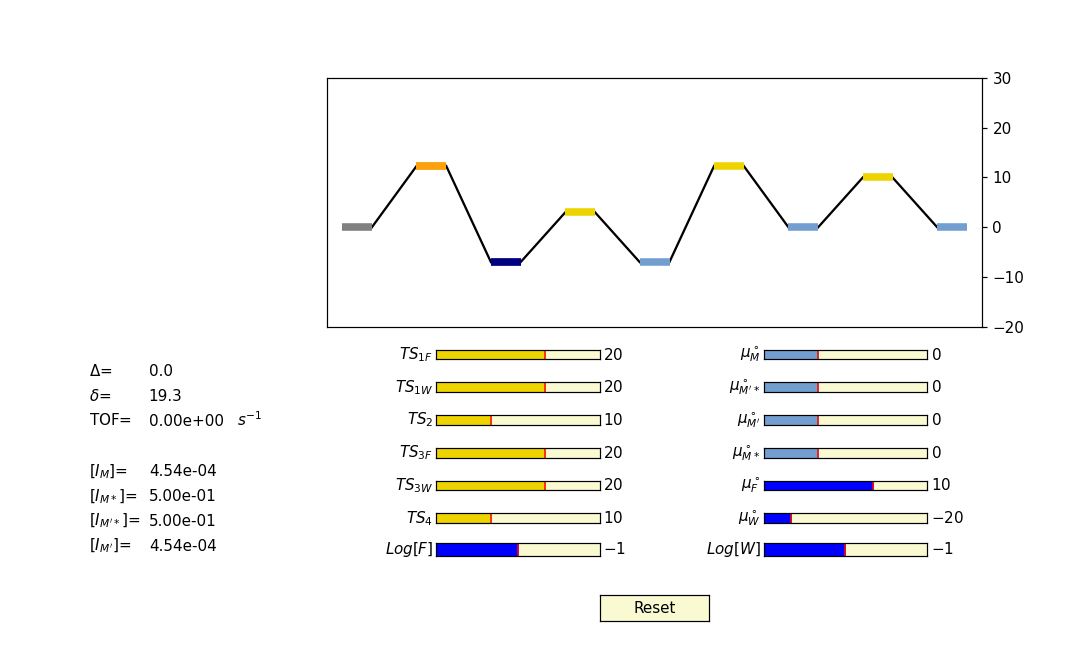

0

In [23]:
## Note:
##- sistema la superficie iniziale
##- fa' bene i conti per il disegno

fig2, ax2 = plt.subplots(1,1,figsize=(10,6))
#fig2, ax2 = plt.subplots()
plt.subplots_adjust(bottom=0.5, left=0.3)

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

ylim = 30
ax2.set_ylim([-20, 30])

######### STARTING SURFACE
i0 = 0.0

ii1, ii2, ii3, ii4 = 0,0,0,0
it1f, it1w, it2, it3f, it3w, it4 = 20,20,10,20,20,10
imF, imW, iF, iW = 10, -20, 0.1, 0.1

at1 = i0  - np.log(np.exp(ii4 + imF + np.log(iF) - it1f) + np.exp(ii4 + imW + np.log(iW) - it1w))
ai1 = at1 + np.log(np.exp(ii1 - it1f) + np.exp(ii1 -it1w)) 
at2 = ai1 + it2 - ii1
ai2 = at2 + ii2 - it2
at3 = ai2 - np.log(np.exp(ii2 - it3f) + np.exp(ii2 - it3w))
ai3 = at3 + np.log(np.exp(ii3 + imF + np.log(iF) - it3f) + np.exp(ii3 + imW + np.log(iW) - it3w))
at4 = ai3 + it4 - ii3
ai4 = at4 + ii4 - it4

iI = np.array([ai1,ai2,ai3,ai4])
iT = np.array([at1,at2,at3,at4])

iTOF, iXTOFT, iXTOFI  = kozn(-ai4,iI,iT)

######### Is and Ts

ax2.plot(0,0,'_',c='#808080',markersize=20,markeredgewidth=5,zorder=10)
intermidiates, = plt.plot([1,2,3,4],iI,'_',c='#729fcfff',markersize=20,markeredgewidth=5,zorder=10)
transitionstates, = plt.plot([0.5,1.5,2.5,3.5],iT,'_',c='#edd400ff', markersize=20,markeredgewidth=5,zorder=10)
TDT, = plt.plot(np.argmax(iXTOFT)+0.5,[iT[np.argmax(iXTOFT)]],'_',c='#ff9f10ff',markersize=20,markeredgewidth=5,zorder=15)
TDI, = plt.plot(np.argmax(iXTOFI)+1,[iI[np.argmax(iXTOFI)]],'_',c='#000080ff',markersize=20,markeredgewidth=5,zorder=15)

########## LINES

l1l, = plt.plot([0.1, 0.4], [i0, at1],color='#000000ff',zorder=5)
l1r, = plt.plot([0.6, 0.9], [at1, ai1],color='#000000ff',zorder=5)

l2l, = plt.plot([1.1, 1.4], [ai1, at2],color='#000000ff',zorder=5)
l2r, = plt.plot([1.6, 1.9], [at2, ai2],color='#000000ff',zorder=5)

l3l, = plt.plot([2.1, 2.4], [ai2, at3],color='#000000ff',zorder=5)
l3r, = plt.plot([2.6, 2.9], [at3, ai3],color='#000000ff',zorder=5)

l4l, = plt.plot([3.1, 3.4], [ai3, at4],color='#000000ff',zorder=5)
l4r, = plt.plot([3.6, 3.9], [at4, ai4],color='#000000ff',zorder=5)

########## DATA
xb = -1
yb = + 50

kr_text = plt.text(-0.8 + xb,-80 +yb,'$\Delta$=')
kr = plt.text(-0.4 + xb,-80 +yb,"%.1f" % ii4)

span_text = plt.text(-0.8 +xb,-85+yb,'$\delta$=')
span_val = plt.text(-0.4 +xb,-85 +yb,"%.1f" % (iT[np.argmax(iXTOFT)]-iI[np.argmax(iXTOFI)]))

tof_text = plt.text(-0.8+xb,-90+yb,'TOF=                      $s^{-1}$')
tof_val = plt.text(-0.4 +xb,-90+yb,"%.2e" % iTOF)
i1_text = plt.text(-0.8 +xb,-100+yb,'[$I_M$]=')
i1_val = plt.text(-0.4  +xb,-100+yb,"%.2e" % iXTOFI[3])
i2_text = plt.text(-0.8 +xb,-105+yb,'[$I_{M*}$]=')
i2_val = plt.text(-0.4  +xb,-105+yb,"%.2e" % iXTOFI[0])
i3_text = plt.text(-0.8 +xb,-110+yb,"[$I_{M'*}$]=")
i3_val = plt.text(-0.4  +xb,-110+yb,"%.2e" % iXTOFI[1])
i4_text = plt.text(-0.8 +xb,-115+yb,"[$I_{M'}$]=")
i4_val = plt.text(-0.4  +xb,-115+yb,"%.2e" % iXTOFI[2])
##########

axcolor = 'lightgoldenrodyellow'
axt1f = plt.axes([0.4, 0.45, 0.15, 0.015], facecolor=axcolor)
axt1w = plt.axes([0.4, 0.40, 0.15, 0.015], facecolor=axcolor)
axt2 = plt.axes([ 0.4, 0.35,  0.15, 0.015], facecolor=axcolor)
axt3f = plt.axes([0.4, 0.30, 0.15, 0.015], facecolor=axcolor)
axt3w = plt.axes([0.4, 0.25, 0.15, 0.015], facecolor=axcolor)
axt4 = plt.axes([ 0.4, 0.20,  0.15, 0.015], facecolor=axcolor)
axi4 = plt.axes([ 0.7, 0.45,  0.15, 0.015], facecolor=axcolor)
axi2 = plt.axes([ 0.7, 0.40,  0.15, 0.015], facecolor=axcolor)
axi3 = plt.axes([ 0.7, 0.35,  0.15, 0.015], facecolor=axcolor)
axi1 = plt.axes([ 0.7, 0.30,  0.15, 0.015], facecolor=axcolor)

axmF = plt.axes([0.7, 0.25, 0.15, 0.015], facecolor=axcolor)
axmW = plt.axes([0.7, 0.2, 0.15, 0.015], facecolor=axcolor)
axF = plt.axes([0.4, 0.15, 0.15, 0.02], facecolor=axcolor)
axW = plt.axes([0.7, 0.15, 0.15, 0.02], facecolor=axcolor)

st1f = Slider(axt1f, '$TS_{1F}$', 0, ylim, valinit=it1f,orientation='horizontal',color='#edd400ff')
st1w = Slider(axt1w, '$TS_{1W}$', 0, ylim, valinit=it1w,orientation='horizontal',color='#edd400ff')
st2 = Slider(axt2,   '$TS_2$', 0, ylim, valinit=it2,orientation='horizontal',color='#edd400ff')
st3f = Slider(axt3f, '$TS_{3F}$', 0, ylim, valinit=it3f,orientation='horizontal',color='#edd400ff')
st3w = Slider(axt3w, '$TS_{3W}$', 0, ylim, valinit=it3w,orientation='horizontal',color='#edd400ff')
st4 = Slider(axt4, '$TS_4$', 0, ylim, valinit=it4,orientation='horizontal',color='#edd400ff')
si1 = Slider(axi1, '$\mu^\circ_{M*}$', -15, ylim, valinit=ii1,orientation='horizontal',color='#729fcfff')
si2 = Slider(axi2, "$\mu^\circ_{M'*}$", -15, ylim, valinit=ii2,orientation='horizontal',color='#729fcfff')
si3 = Slider(axi3, "$\mu^\circ_{M'}$", -15, ylim, valinit=ii3,orientation='horizontal',color='#729fcfff')
si4 = Slider(axi4, '$\mu^\circ_{M}$', -15, ylim, valinit=ii4,orientation='horizontal',color='#729fcfff')

smF = Slider(axmF, '$\mu^\circ_F$', -30, 30, valinit=imF,orientation='horizontal',color='b')
smW = Slider(axmW, '$\mu^\circ_W$', -30, 30, valinit=imW,orientation='horizontal',color='b')
sF = Slider(axF, '$Log [F]$', -4, 2, valinit=np.log10(iF),orientation='horizontal',color='b')
sW = Slider(axW, '$Log [W]$', -4, 2, valinit=np.log10(iW),orientation='horizontal',color='b')



def update(val):
    F  = 10**sF.val
    W  = 10**sW.val
    t1 = 0  - np.log(np.exp(si4.val + smF.val + np.log(F) - st1f.val) + np.exp(si4.val + smW.val + np.log(W) - st1w.val))
    i1 = t1 + np.log(np.exp(si1.val - st1f.val) + np.exp(si1.val -st1w.val)) 
    t2 = i1 + st2.val - si1.val
    i2 = t2 + si2.val - st2.val
    t3 = i2 - np.log(np.exp(si2.val - st3f.val) + np.exp(si2.val - st3w.val))
    i3 = t3 + np.log(np.exp(si3.val + smF.val + np.log(F) - st3f.val) + np.exp(si3.val + smW.val + np.log(W) - st3w.val))
    t4 = i3 + st4.val - si3.val
    i4 = t4 + si4.val - st4.val
    I = np.array([i1,i2,i3,i4])
    T = np.array([t1,t2,t3,t4])
    intermidiates.set_ydata(I)
    transitionstates.set_ydata(T)
    TOF, XTOFT, XTOFI  = kozn(-I[3],I,T)
    kr.set_text("%.1f" % I[3])
    span_val.set_text("%.1f" % (T[np.argmax(XTOFT)]-I[np.argmax(XTOFI)]))
    tof_val.set_text("%.2e" % TOF)
    i1_val.set_text("%.2e" % XTOFI[3])
    i2_val.set_text("%.2e" % XTOFI[0])
    i3_val.set_text("%.2e" % XTOFI[1])
    i4_val.set_text("%.2e" % XTOFI[2])
    TDT.set_ydata([T[np.argmax(XTOFT)]])
    TDT.set_xdata(np.argmax(XTOFT)+0.5)
    TDI.set_ydata([I[np.argmax(XTOFI)]])
    TDI.set_xdata(np.argmax(XTOFI)+1)
    l1l.set_ydata([0,T[0]])
    l1r.set_ydata([T[0],I[0]])
    l2l.set_ydata([I[0],T[1]])
    l2r.set_ydata([T[1],I[1]])
    l3l.set_ydata([I[1],T[2]])
    l3r.set_ydata([T[2],I[2]])
    l4l.set_ydata([I[2],T[3]])
    l4r.set_ydata([T[3],I[3]])
    fig2.canvas.draw_idle()

st1f.on_changed(update)
st1w.on_changed(update)
st2.on_changed(update)
st3f.on_changed(update)
st3w.on_changed(update)
st4.on_changed(update)
si1.on_changed(update)
si2.on_changed(update)
si3.on_changed(update)
si4.on_changed(update)
smF.on_changed(update)
sF.on_changed(update)
smW.on_changed(update)
sW.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.55, 0.05, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    st1f.reset()
    st1w.reset()
    si1.reset()
    st2.reset()
    si2.reset()
    st3f.reset()
    st3w.reset()
    si3.reset()
    st4.reset()
    si4.reset()
    smF.reset()
    sF.reset()
    smW.reset()
    sW.reset()
button.on_clicked(reset)



<IPython.core.display.Javascript object>


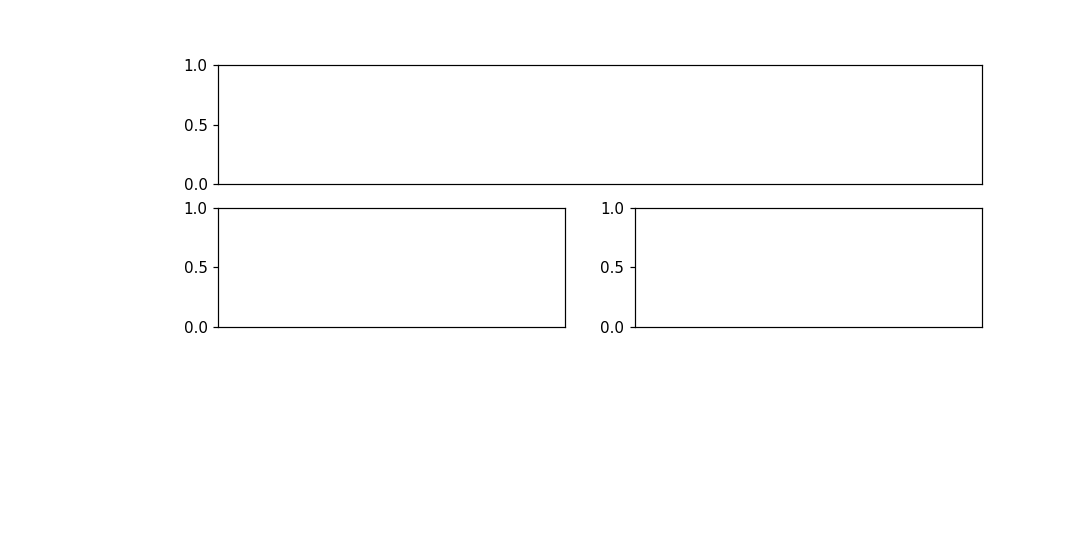

/tmp/ipykernel_4844/943505061.py:15: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.4, left=0.2)


In [53]:
import matplotlib.gridspec as gridspec



fig3 = plt.figure(constrained_layout=True, figsize=(10,5))
gs = fig3.add_gridspec(2, 2)
f3_ax = fig3.add_subplot(gs[0,0:])
f3_axf = fig3.add_subplot(gs[1,:-1])
f3_axw = fig3.add_subplot(gs[1,-1:])

f3_ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
f3_axf.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
f3_axw.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

plt.subplots_adjust(bottom=0.4, left=0.2)
